# Table of Contents

1) [Imports and Data Read-in](#imports-and-data-read-in)
2) [Plotting the Sounds](#plotting-the-sounds)  
  2.1 [Plotting the waves](#plotting-the-waves)  
  2.2 [Plotting the Spectrograms](#plotting-the-spectrograms)  
3) [Looking into Trimming the Audio Files](#looking-into-trimming-the-audio-files)  
  3.1 [Trimming Each Sound Level](#trimming-each-sound-level)  
  3.2 [Conclusion](#conclusion)
4) [Looking in Mixing Audio Files](#looking-in-mixing-audio-files)

# Imports and Data Read in
[back to top](#table-of-contents)

In [29]:
# Importing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import re
import librosa
import librosa.display
import librosa.effects

In [30]:
# Setting Roots
soundsRoot = "../../../../mnt/c/Users/erlan/OneDrive/Documents_onedrive/MLmusic/sounds/"
cellosRoot = soundsRoot + "cellowav/"
violinsRoot = soundsRoot + "violinwav/"
clarinetRoot = soundsRoot + "clarinetwav/"
fluteRoot = soundsRoot + "flutewav/"
guitarRoot = soundsRoot + "guitarwav/"

# Function for getting a random file from a root
def getSoundFilePath(root):
    files = os.listdir(root)
    noteFolder = root + files[np.random.randint(0, len(files))]
    soundFile = noteFolder + "/" + os.listdir(noteFolder)[np.random.randint(0, len(os.listdir(noteFolder)))]
    return soundFile

# Dictionary of a different instrument sounds
sounds = {"cello" : librosa.load(getSoundFilePath(cellosRoot))[0],
          "violin" : librosa.load(getSoundFilePath(violinsRoot))[0],
          "clarinet" : librosa.load(getSoundFilePath(clarinetRoot))[0],
          "flute" : librosa.load(getSoundFilePath(fluteRoot))[0],
          "guitar" : librosa.load(getSoundFilePath(guitarRoot))[0]}

# Plotting the Sounds
[back to top](#table-of-contents)

### Plotting the waves

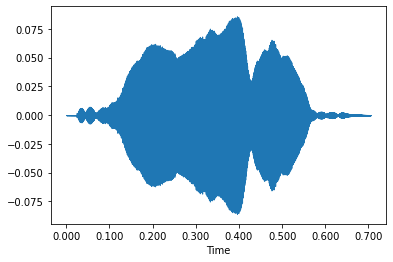

In [31]:
librosa.display.waveshow(sounds["cello"], sr=22050)

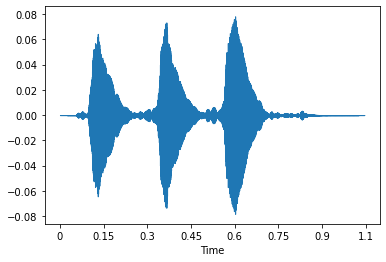

In [32]:
librosa.display.waveshow(sounds["violin"], sr=22050)

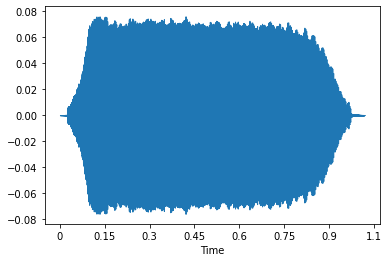

In [33]:
librosa.display.waveshow(sounds["clarinet"], sr=22050)

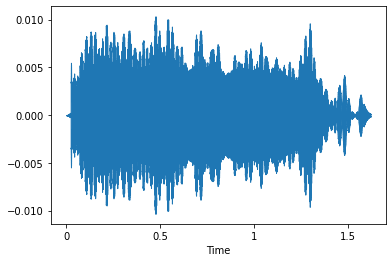

In [34]:
librosa.display.waveshow(sounds["flute"], sr=22050)

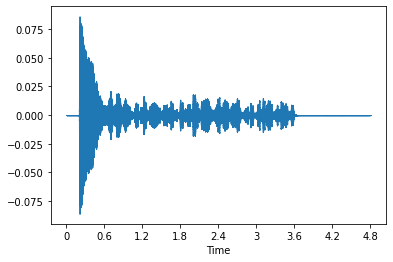

In [35]:
librosa.display.waveshow(sounds["guitar"], sr=22050)

### Plotting the Spectrograms

/home/berlands/.local/lib/python3.8/site-packages/librosa/util/decorators.py:88: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  return f(*args, **kwargs)


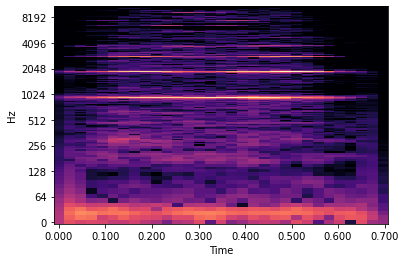

In [36]:
# Cello
D = librosa.amplitude_to_db(librosa.stft(sounds["cello"]), ref=np.max)
librosa.display.specshow(D, y_axis='log', x_axis='time')

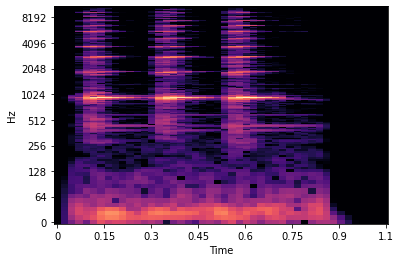

In [37]:
# Violin
D = librosa.amplitude_to_db(librosa.stft(sounds["violin"]), ref=np.max)
librosa.display.specshow(D, y_axis='log', x_axis='time')

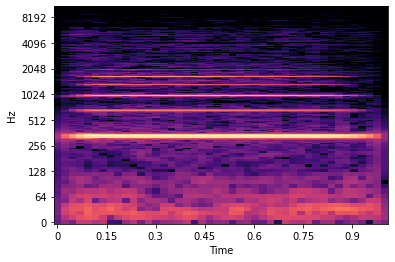

In [38]:
# Clarinet
D = librosa.amplitude_to_db(librosa.stft(sounds["clarinet"]), ref=np.max)
librosa.display.specshow(D, y_axis='log', x_axis='time')

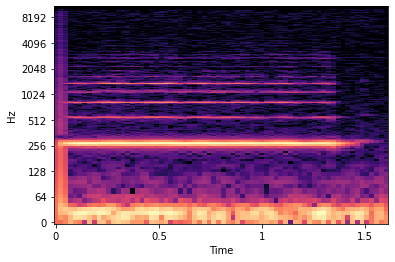

In [39]:
# Flute
D = librosa.amplitude_to_db(librosa.stft(sounds["flute"]), ref=np.max)
librosa.display.specshow(D, y_axis='log', x_axis='time')

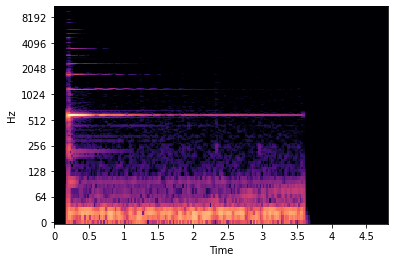

In [40]:
# Guitar
D = librosa.amplitude_to_db(librosa.stft(sounds["guitar"]), ref=np.max)
librosa.display.specshow(D, y_axis='log', x_axis='time')

# Looking into Trimming the Audio Files
[back to top](#table-of-contents)

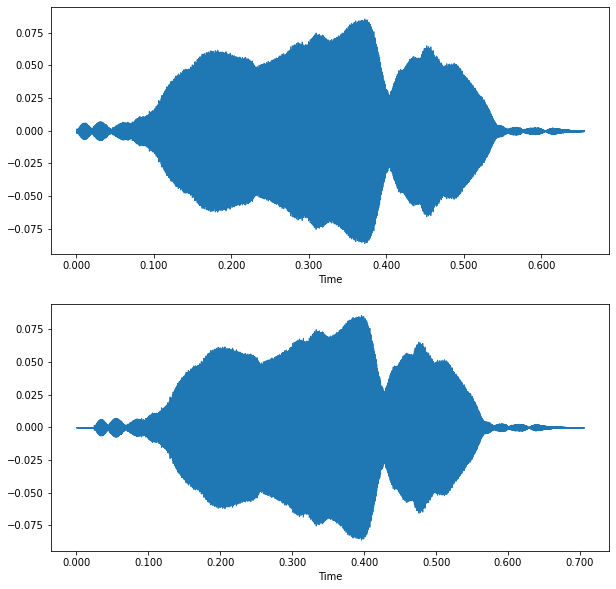

In [41]:
# Cello
fig, ax = plt.subplots(2, 1, figsize=(10, 10))
trimmed = librosa.effects.trim(sounds["cello"], frame_length=1,
                               hop_length=1, top_db=50)
librosa.display.waveshow(trimmed[0], sr=22050, ax=ax[0])
librosa.display.waveshow(sounds["cello"], sr=22050, ax=ax[1])

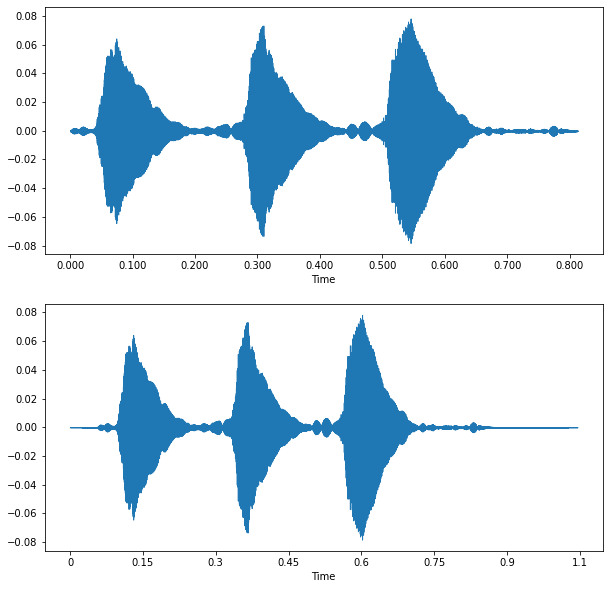

In [42]:
# Violin
fig, ax = plt.subplots(2, 1, figsize=(10, 10))
trimmed = librosa.effects.trim(sounds["violin"], frame_length=1,
                               hop_length=1, top_db=50)
librosa.display.waveshow(trimmed[0], sr=22050, ax=ax[0])
librosa.display.waveshow(sounds["violin"], sr=22050, ax=ax[1])

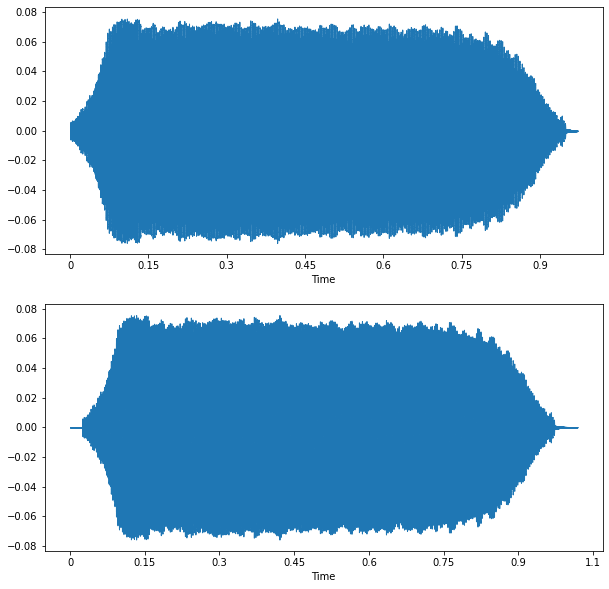

In [43]:
# Clarinet
fig, ax = plt.subplots(2, 1, figsize=(10, 10))
trimmed = librosa.effects.trim(sounds["clarinet"], frame_length=1,
                               hop_length=1, top_db=50)
librosa.display.waveshow(trimmed[0], sr=22050, ax=ax[0])
librosa.display.waveshow(sounds["clarinet"], sr=22050, ax=ax[1])

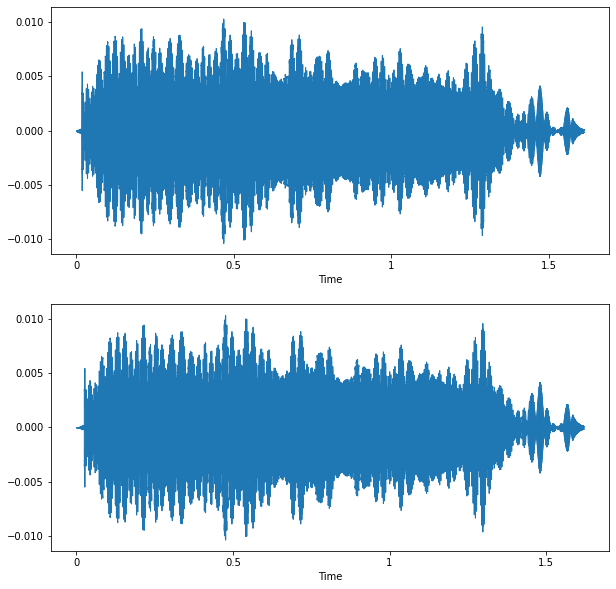

In [44]:
# Flute
fig, ax = plt.subplots(2, 1, figsize=(10, 10))
trimmed = librosa.effects.trim(sounds["flute"], frame_length=1,
                               hop_length=1, top_db=50)
librosa.display.waveshow(trimmed[0], sr=22050, ax=ax[0])
librosa.display.waveshow(sounds["flute"], sr=22050, ax=ax[1])

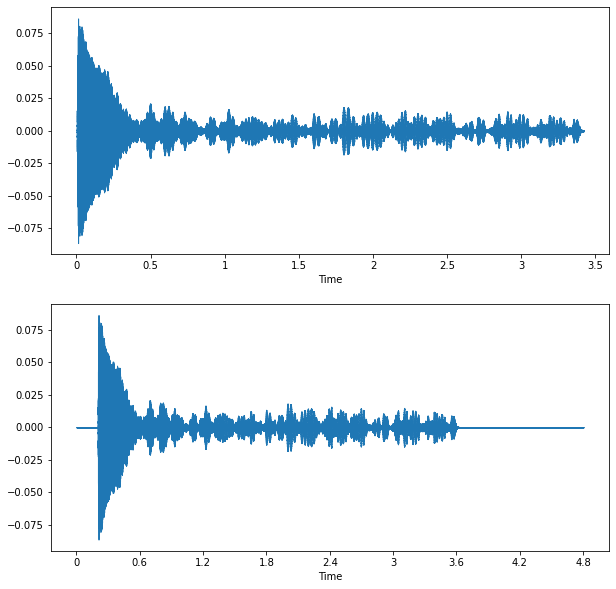

In [45]:
# Guitar
fig, ax = plt.subplots(2, 1, figsize=(10, 10))
trimmed = librosa.effects.trim(sounds["guitar"], frame_length=1,
                               hop_length=1, top_db=50)
librosa.display.waveshow(trimmed[0], sr=22050, ax=ax[0])
librosa.display.waveshow(sounds["guitar"], sr=22050, ax=ax[1])

### Trimming Each Sound Level

In [46]:
# files in cello root
files = os.listdir(cellosRoot+"/cello_A/")

# Getting the play volumes
files = [file.split("_")[3:-1] for file in files]
volumes = [f[0] for f in np.unique(files)[1:]]

/home/berlands/.local/lib/python3.8/site-packages/numpy/lib/arraysetops.py:270: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ar = np.asanyarray(ar)


In [57]:
# Get one sound of each volume for each instrument
sounds = {}
roots = {"cello": cellosRoot, "violin": violinsRoot,
         "clarinet": clarinetRoot, "flute": fluteRoot,
         "guitar": guitarRoot}
         
for instrument in ["cello", "violin", "clarinet", "flute", "guitar"]:
    sounds[instrument] = {}
    for volume in volumes:
        # find files with volume in it
        files = os.listdir(roots[instrument] + "/" + instrument + "_A/")
        files = [file for file in files if re.search(volume, file)]

        # Skipping if no files found
        if len(files) == 0:
            print("No files found for volume: ", instrument, volume)
            continue

        # Getting a path
        path = (roots[instrument] + "/" + instrument +
                "_A/" + files[np.random.randint(0, len(files))])

        # loading the sound
        sounds[instrument][volume] = librosa.load(path)[0]

Loaded sound from:  ../../../../mnt/c/Users/erlan/OneDrive/Documents_onedrive/MLmusic/sounds/cellowav//cello_A/cello_As2_05_forte_arco-no.wav
Loaded sound from:  ../../../../mnt/c/Users/erlan/OneDrive/Documents_onedrive/MLmusic/sounds/cellowav//cello_A/cello_A4_1_fortissimo_arco.wav
Loaded sound from:  ../../../../mnt/c/Users/erlan/OneDrive/Documents_onedrive/MLmusic/sounds/cellowav//cello_A/cello_A2_025_mezzo-forte_a.wav
Loaded sound from:  ../../../../mnt/c/Users/erlan/OneDrive/Documents_onedrive/MLmusic/sounds/cellowav//cello_A/cello_As2_025_mezzo-piano_.wav
Loaded sound from:  ../../../../mnt/c/Users/erlan/OneDrive/Documents_onedrive/MLmusic/sounds/cellowav//cello_A/cello_As4_05_pianissimo_ar.wav
Loaded sound from:  ../../../../mnt/c/Users/erlan/OneDrive/Documents_onedrive/MLmusic/sounds/cellowav//cello_A/cello_As3_15_mezzo-piano_a.wav
Loaded sound from:  ../../../../mnt/c/Users/erlan/OneDrive/Documents_onedrive/MLmusic/sounds/violinwav//violin_A/violin_As6_1_forte_arco-no.wav
Load

In [77]:
def plotTrimmedSounds(instrument, sounds):
    """For an instrument, plotting the sound and trimmed sound side by side
    for each volume in a grid.

    Args:
        instrument (string): Which instrument to plot
        sounds (dict): Dictionary of sounds with volumes as keys
    """
    volumes = list(sounds.keys())

    # Setting grid and minimizing the space between plots
    fig, ax = plt.subplots(len(volumes), 2, figsize=(10, 10))
    fig.subplots_adjust(hspace=0.05, wspace=0.05)

    for i, volume in enumerate(volumes):
        trimmed = librosa.effects.trim(sounds[volume],
                                       frame_length=1, hop_length=1, top_db=50)
        librosa.display.waveshow(trimmed[0], sr=22050, ax=ax[i, 0])
        librosa.display.waveshow(sounds[volume], sr=22050, ax=ax[i, 1])

        # deleting axis numbers and labels and labeling row volumes
        for j in range(2):
            ax[i, j].set_xlabel("")
            ax[i, j].set_ylabel("")
            ax[i, j].set_xticks([])
            ax[i, j].set_yticks([])
        ax[i, 0].set_ylabel(volume)

    # adding a title and background color
    fig.patch.set_facecolor('white')
    fig.suptitle(instrument[0].upper() + instrument[1:])
    fig.subplots_adjust(top=0.95)
    plt.show()

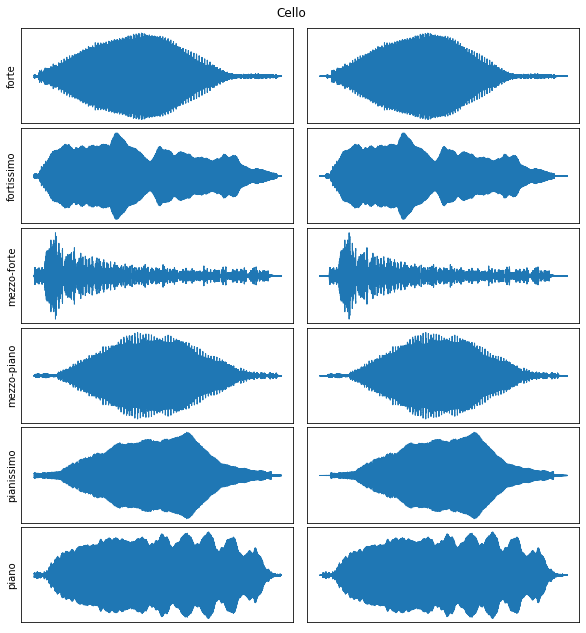

In [78]:
plotTrimmedSounds("cello", sounds["cello"])

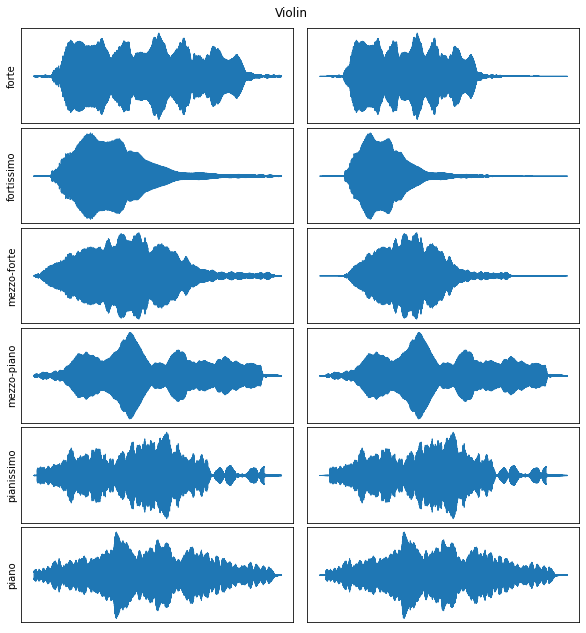

In [79]:
plotTrimmedSounds("violin", sounds["violin"])

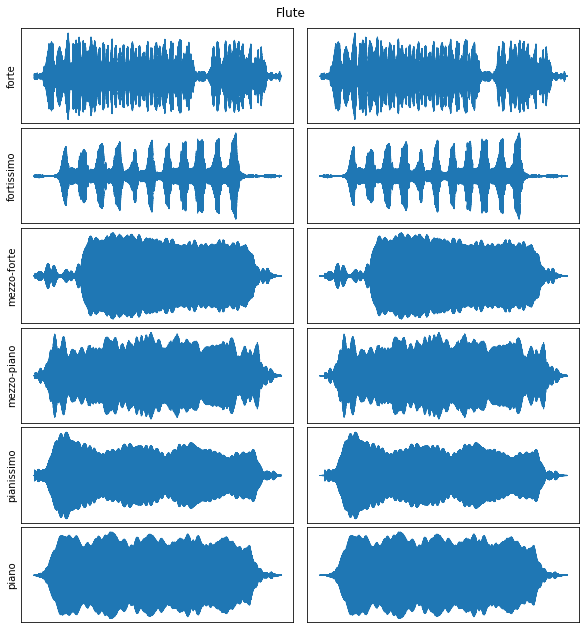

In [80]:
plotTrimmedSounds("flute", sounds["flute"])

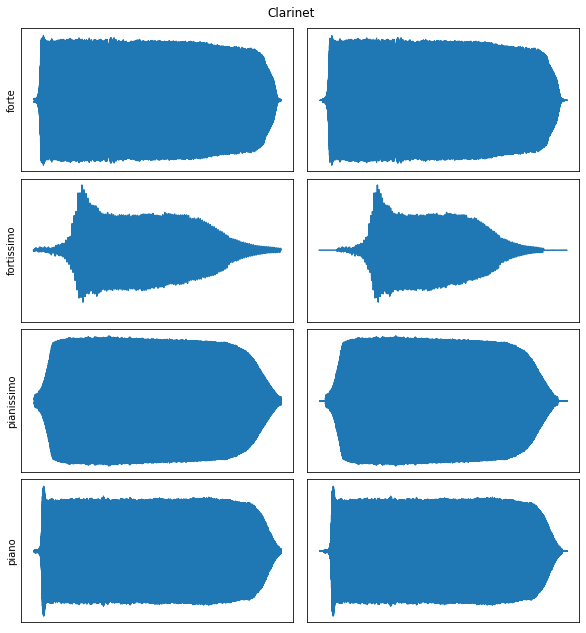

In [81]:
plotTrimmedSounds("clarinet", sounds["clarinet"])

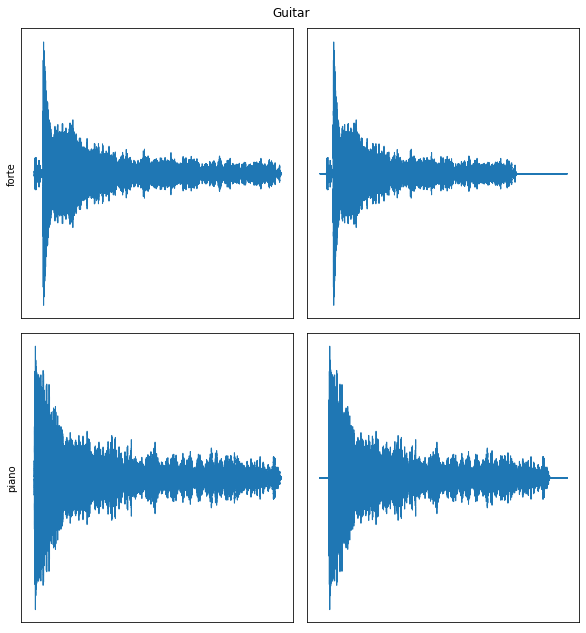

In [82]:
plotTrimmedSounds("guitar", sounds["guitar"])

### Conclusion

It looks like the setting of `frame_length=1`, `hop_length=1`, and `top_db=50` trim enough without trimming actual sound. We will use this when mixing file, so we know exactly where to indicate the start of an instrument.

# Looking in Mixing Audio Files
[Back to top](#table-of-contents)